# Detecção de Fraude

#### Adquirentes são empresas que possuem a respondabilidade de comunicação das transações ebtre estabelecimento financeiro e a bandeira do cartão de crédito. Essas empresas alugam e mantém os equipamentos usados pelos estabelecimentos como, por exemplo, o Point of Sales (POS).

Figura 1: Sistema de autorização de uma transação. Fonte:[Gadi, 2008].
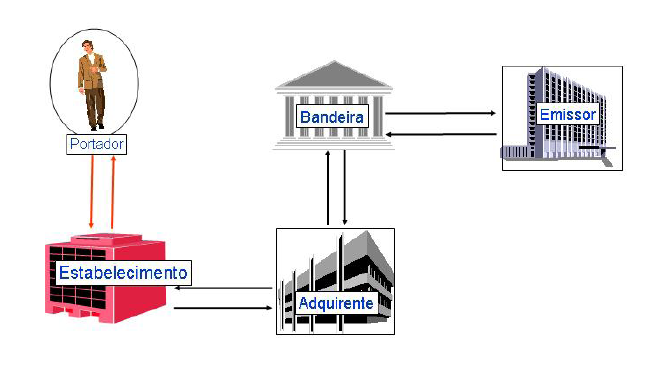

#### Fraude com cartão de crédito é uma das maiores ameaças para estabelecimentos comerciais atualmente. No entanto, para combater a fraude de forma eficaz, é importante primeiro entender os mecanismos de sua execução. Fraudadores de cartão de crédito empregam um grande número de modus operandi para cometer fraudes. Um dos grandes riscos na venda com cartão é o chargeback. Trata-se de um dos maiores temores dos comerciantes de lojas virtuais e muitas vezes podem causar o seu fechamento. Chargeback pode ser definido como o cancelamento de uma venda feita com cartão de débito ou crédito, que pode acontecer por dois motivos: Não reconhecimento da compra por parte do titular do cartão; A transação não obedece às regulamentações previstas nos contratos, termos, aditivos e manuais editados pelas administradoras. Resumindo, o lojista vende e depois descobre que o valor da venda não será creditado porque a compra foi considerada inválida. Se o valor já tiver sido creditado ele será imediatamente estornado ou lançado a débito no caso de inexistência de fundos no momento do lançamento do estorno (JÚNIOR, 2012).

Referências: 

Gadi, M. F. A. (2008). Uma Comparação de Métodos de Classificação Aplicados à
Detecção de Fraude em Cartões de Crédito. São Paulo.

Júnior, J. F. Mineração de dados para detecção de fraudes em transações eletrônicas 2012.

#### Apresentada a importância de analisar a operção de chargeback, a seguir será desenvolvida uma análise exploratória de dados, o dataset foi obtido no link a seguir: https://gist.github.com/cloudwalk-tests/76993838e65d7e0f988f40f1b1909c97#file-transactional-sample-csv


# Análise de chargeback

In [2]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
#lendo o csv como dataframe
df=pd.read_csv('transactional-sample.csv', sep=',', parse_dates=['transaction_date'])
df

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,False
...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01 13:05:34.054967,744.15,NaN,False
3195,21323593,9603,59275,528052******3611,2019-11-01 11:47:02.404963,1403.67,NaN,False
3196,21323594,57997,84486,522688******9874,2019-11-01 10:23:50.555604,1.55,NaN,False
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:45.799767,359.68,NaN,False


# Aplicando técnicas de ETL

In [4]:
#validando os dados
df['card_number']=df['card_number'].astype('string')
df['card_number'] = df['card_number'].str.replace(r'\D', '')
df['has_cbk']=df['has_cbk'].astype('string')
df['week_day'] = df['transaction_date'].dt.day_name()
df

<ipython-input-4-4b21fdc34605>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['card_number'] = df['card_number'].str.replace(r'\D', '')


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,week_day
0,21320398,29744,97051,4345059116,2019-12-01 23:16:32.812632,374.56,285475.0,False,Sunday
1,21320399,92895,2708,4444564210,2019-12-01 22:45:37.873639,734.87,497105.0,True,Sunday
2,21320400,47759,14777,4258507024,2019-12-01 22:22:43.021495,760.36,NaN,False,Sunday
3,21320401,68657,69758,4642963991,2019-12-01 21:59:19.797129,2556.13,NaN,True,Sunday
4,21320402,54075,64367,6504876116,2019-12-01 21:30:53.347051,55.36,860232.0,False,Sunday
...,...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,6504864139,2019-11-01 13:05:34.054967,744.15,NaN,False,Friday
3195,21323593,9603,59275,5280523611,2019-11-01 11:47:02.404963,1403.67,NaN,False,Friday
3196,21323594,57997,84486,5226889874,2019-11-01 10:23:50.555604,1.55,NaN,False,Friday
3197,21323595,35930,7,5443157773,2019-11-01 01:29:45.799767,359.68,NaN,False,Friday


In [5]:
#tipos de variáveis
df.dtypes

transaction_id                 int64
merchant_id                    int64
user_id                        int64
card_number                   string
transaction_date      datetime64[ns]
transaction_amount           float64
device_id                    float64
has_cbk                       string
week_day                      object
dtype: object

In [6]:
#criando tabela com colunas selecionadas
nova_tabela = df[['merchant_id','card_number','transaction_date','week_day','transaction_amount','has_cbk']]
nova_tabela['count'] = 1
nova_tabela

<ipython-input-6-d283f6001ffd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nova_tabela['count'] = 1


,merchant_id,card_number,transaction_date,week_day,transaction_amount,has_cbk,count
0,29744,4345059116,2019-12-01 23:16:32.812632,Sunday,374.56,False,1
1,92895,4444564210,2019-12-01 22:45:37.873639,Sunday,734.87,True,1
2,47759,4258507024,2019-12-01 22:22:43.021495,Sunday,760.36,False,1
3,68657,4642963991,2019-12-01 21:59:19.797129,Sunday,2556.13,True,1
4,54075,6504876116,2019-12-01 21:30:53.347051,Sunday,55.36,False,1
...,...,...,...,...,...,...,...
3194,50493,6504864139,2019-11-01 13:05:34.054967,Friday,744.15,False,1
3195,9603,5280523611,2019-11-01 11:47:02.404963,Friday,1403.67,False,1
3196,57997,5226889874,2019-11-01 10:23:50.555604,Friday,1.55,False,1
3197,35930,5443157773,2019-11-01 01:29:45.799767,Friday,359.68,False,1


# Análise exploratória
- Tomada de decisão inicial para aprovação da transação a partir do hsitórico do cliente
- Qual o dia com maior chargeback?
- Qual o horário de maior chargeback?

In [10]:
#código para filtrar cliente e número do cartão
id_cliente = int(input('Qual o código do cliente?'))
numero_cartao = str(input('Qual o número do cartão?'))
valor_transacao = int(input('Qual o valor da transação?'))

filtro_1 = nova_tabela.merchant_id == id_cliente
filtro_2 = nova_tabela.has_cbk == 'True'
#filtro_3 = nova_tabela.week_day == 'Friday'
filtro_4 = nova_tabela.card_number == numero_cartao
#filtro_5 = nova_tabela.transaction_date >= '16:00:00' 
filtro = nova_tabela.loc[filtro_1 & filtro_2 & filtro_4] 
filtro

Qual o código do cliente?92895
Qual o número do cartão?4444564210
Qual o valor da transação?2000


,merchant_id,card_number,transaction_date,week_day,transaction_amount,has_cbk,count
1,92895,4444564210,2019-12-01 22:45:37.873639,Sunday,734.87,True,1


In [11]:
#numero de tentativas com o mesmo cartão
filtro.groupby(['merchant_id','card_number','has_cbk']).size().sort_values(ascending=False)

merchant_id  card_number  has_cbk
92895        4444564210   True       1
dtype: int64

In [12]:
#comparação de compras passadas do cliente com a transação atual
valor_total = filtro['transaction_amount'].sum()
valor_medio = filtro['transaction_amount'].mean()
valor_max = filtro['transaction_amount'].max()
print('O Valor total das transações recusadas por este cliente é:', valor_total,
      '\n O Valor médio das transações recusadas deste cliente é:', valor_medio,
     '\n O Valor máximo das transações recusadas por este cliente é:', valor_max)

O Valor total das transações recusadas por este cliente é: 734.87 
 O Valor médio das transações recusadas deste cliente é: 734.87 
 O Valor máximo das transações recusadas por este cliente é: 734.87


In [13]:
#Criando alerta de uma tomada de decisão inicial
if (valor_transacao>valor_max):
    print('O Valor da transação é maior do que o valor máximo das transações anteriores, ATENÇÃO!')
elif (valor_transacao==valor_max):
    print('O Valor da transação é igual ao valor máximo das transações anteriores, ATENÇÃO!')
else:
    print('O Valor da transação atual é menor do que o valor máximo das transações anteriores!')
    
    
    

O Valor da transação é maior do que o valor máximo das transações anteriores, ATENÇÃO!


In [14]:
#classificação dos dados
nova_tabela.groupby(['merchant_id','card_number','has_cbk']).size().sort_values(ascending=False)

merchant_id  card_number  has_cbk
77130        5544827640   True       10
30121        5201327705   False       5
93520        4329577262   False       5
89943        6516532256   True        5
36929        6516603628   False       4
                                     ..
32186        5447315751   False       1
             5502097657   False       1
32213        5502095404   False       1
             5502096493   False       1
99799        4108636554   False       1
Length: 2970, dtype: int64

In [19]:
#calculando os clientes que mais acumulam transações falsas
f2 = nova_tabela.merchant_id == 49205
f3 = nova_tabela.has_cbk == 'True'
fa = nova_tabela.loc[f3] 
fb = nova_tabela.loc[f2 & f3] 
fa.groupby(['merchant_id','has_cbk']).size().sort_values(ascending=False)

merchant_id  has_cbk
17275        True       22
4705         True       19
1308         True       15
53041        True       14
77130        True       13
                        ..
38901        True        1
29744        True        1
25473        True        1
25199        True        1
99644        True        1
Length: 118, dtype: int64

In [20]:
#cartão com mais tentativa falsa
q1 = nova_tabela.has_cbk == 'True'
q = nova_tabela.loc[q1] 
q.groupby(['card_number','has_cbk']).size().sort_values(ascending=False)

card_number  has_cbk
5544827640   True       10
5300343859   True        6
6516532256   True        5
5522898870   True        4
5300348258   True        4
                        ..
4984011451   True        1
4984012440   True        1
4984014043   True        1
4984014982   True        1
5155904661   True        1
Length: 274, dtype: int64

In [21]:
#número de clientes que já tiveram ao menos uma tentativa falsa
v = nova_tabela.drop_duplicates(subset='merchant_id', keep="last")
fv1 = v.has_cbk == 'True'
fv2 = v.loc[fv1] 
sum_v = fv2['count'].sum()
sum_v

84

In [22]:
#porcentagem de clientes que já tiveram alguma transação falsa
sum_tot = v['count'].sum()
sum_tot
p_tot = (sum_v/sum_tot)*100
p_tot

4.783599088838269

In [23]:
#número de cartões que já tiveram uma tentativa falsa
w = nova_tabela.drop_duplicates(subset='card_number', keep="last")
fw1 = w.has_cbk == 'True'
fw2 = w.loc[fw1] 
#sum_v = fv2['count'].sum()
#sum_v
sum_w = fw2['count'].sum()
sum_w

268

In [24]:
#valor total de transações
vt = nova_tabela['transaction_amount'].sum()
vt

2456233.48

In [25]:
#total de transações 
tt = nova_tabela['count'].sum()
tt

3199

In [26]:
#calculando o total em valores reais de transações falsas 
f1 = nova_tabela.has_cbk == 'True'
f = nova_tabela.loc[f1] 
valor_tot = f['transaction_amount'].sum()
valor_tot

568346.62

In [13]:
#separar chargeback por dias da semana
nova_tabela_true = nova_tabela.loc[nova_tabela.has_cbk == 'True']

days = ('Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday')
a=[]
b=[]

for day in days:
    a.append(nova_tabela_true.loc[nova_tabela.week_day == day]['count'].sum())
    b.append(nova_tabela_true.loc[nova_tabela.week_day == day]['transaction_amount'].sum())

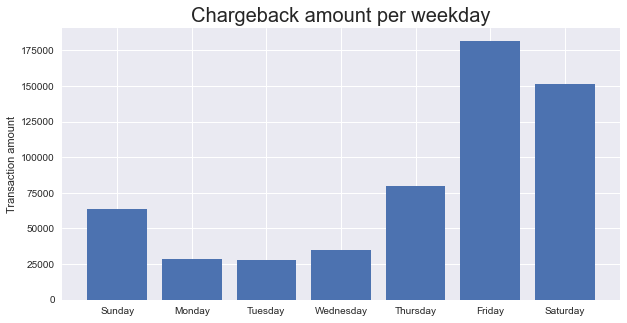

In [14]:
#valor total de transações por dias da semana
plt.figure(figsize=(10,5))
plt.bar(days,b)
plt.ylabel("Transaction amount")
plt.title('Chargeback amount per weekday', fontdict={'size': 20})
plt.savefig('amount_chargeback_days_week.png')
plt.show();

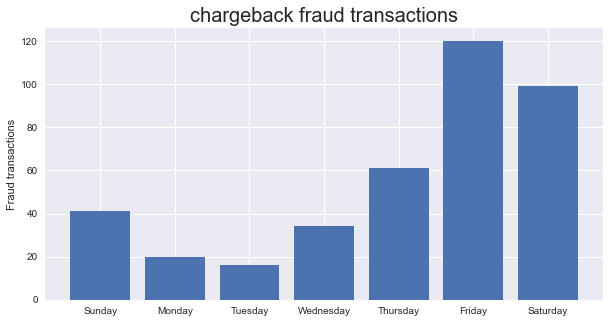

In [15]:
#numeros de transações por dia da semana
plt.figure(figsize=(10,5))
plt.bar(days,a)
plt.ylabel("Fraud transactions")
plt.title('chargeback fraud transactions', fontdict={'size': 20})
plt.savefig('chargeback_fraud_transactions_days_week.png')
plt.show()

# Conclusão

- Período de análise: 01/11/2019 à 01/12/2019
- Total de transações solicitadas: 3199
- Valor total movimentado:  2.456.233,48 
- Valor total de chargeback: 568.346,62 (23,14%)
- Clientes que já tiveram ao menos um chargeback: 4,78%
- Sexta, sábado e quinta-feira são os dias com maior número de chargeback respectivamente.
- Clientes 17275, 4705 e 1308 possuem os maiores índices de chargeback
- Os cartões 5544827640, 5300343859 e 6516532256 possuem os maiores índices de chargeback.